In [121]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# Načtení dataframu, jeho transpozice a úprava (v excelu jsem přidala řádek 'index')
df = pd.read_excel('Data_MBP_SPO2.xlsx')
df = df.T
df.columns = df.iloc[0]
df.drop('index', inplace=True)
df.head()

index,MBP1,SPO21,MBP2,SPO22
0,35,91,89,96
1,34,91,89,96
2,35,91,89,96
3,35,91,89,96
4,34,91,75,96


In [136]:
# Rozdělení dataframu na pacienty
pac1 = df.iloc[:18,0:2]
pac2 = df.iloc[:, 2:4]
pac2.head()

index,MBP2,SPO22
0,89,96
1,89,96
2,89,96
3,89,96
4,75,96


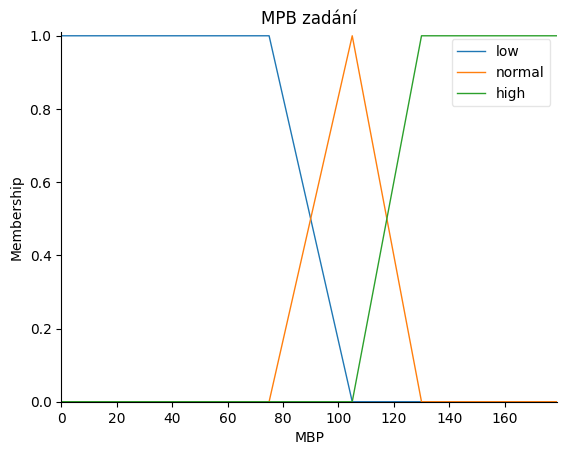

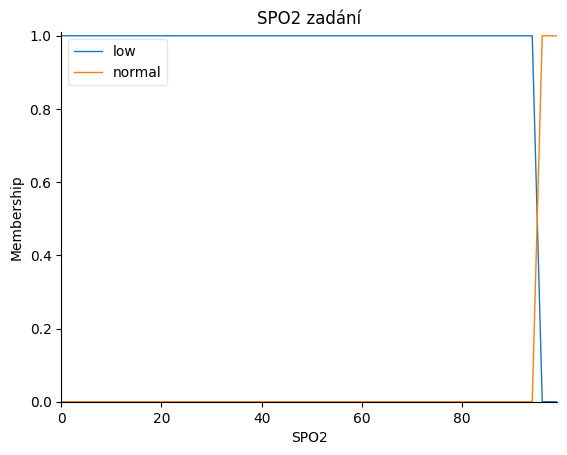

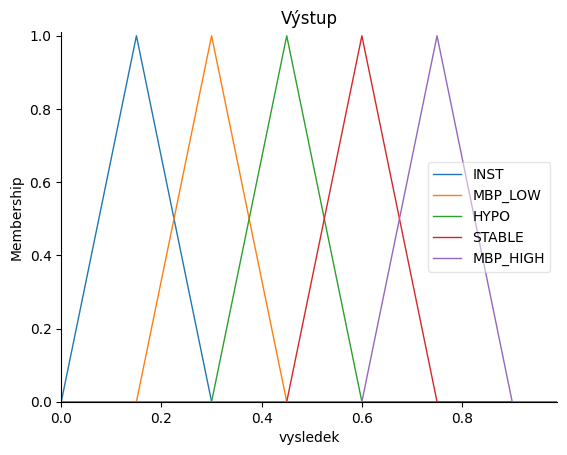

In [135]:
# Definice vstupních proměnných
MBP = ctrl.Antecedent(np.arange(0, 180, 1), 'MBP')
SPO2 = ctrl.Antecedent(np.arange(0, 100, 1), 'SPO2')

# Definice fuzzy množin pro vstupní proměnné
MBP['low'] = fuzz.trapmf(MBP.universe, [0, 0, 75, 105])
MBP['normal'] = fuzz.trapmf(MBP.universe, [75, 105, 105, 130])
MBP['high'] = fuzz.trapmf(MBP.universe, [105, 130, 180, 180])

SPO2['low'] = fuzz.trapmf(SPO2.universe, [0, 0, 94, 96])
SPO2['normal'] = fuzz.trapmf(SPO2.universe, [94, 96, 100, 100])

# Definice trojúhelníkové fuzzy množiny pro výstupní proměnnou
VYST = ctrl.Consequent(np.arange(0, 1, 0.01), 'vysledek')
VYST['INST'] = fuzz.trimf(VYST.universe, [0, 0.15, 0.3])
VYST['MBP_LOW'] = fuzz.trimf(VYST.universe, [0.15, 0.3, 0.45])
VYST['HYPO'] = fuzz.trimf(VYST.universe, [0.3, 0.45, 0.6])
VYST['STABLE'] = fuzz.trimf(VYST.universe, [0.45, 0.6, 0.75])
VYST['MBP_HIGH'] = fuzz.trimf(VYST.universe, [0.6, 0.75, 0.9])

#Definice pravidel 
rule1 = ctrl.Rule(antecedent=(MBP['low'] & SPO2['low']), consequent=VYST['INST'])
rule2 = ctrl.Rule(antecedent=(MBP['low'] & SPO2['normal']), consequent=VYST['MBP_LOW'])
rule3 = ctrl.Rule(antecedent=(MBP['normal'] & SPO2['low']), consequent=VYST['HYPO'])
rule4 = ctrl.Rule(antecedent=(MBP['normal'] & SPO2['normal']), consequent=VYST['STABLE'])
rule5 = ctrl.Rule(antecedent=(MBP['high'] & SPO2['low']), consequent=VYST['INST'])
rule6 = ctrl.Rule(antecedent=(MBP['high'] & SPO2['normal']), consequent=VYST['MBP_HIGH'])

# Definice výstupní proměnné
vysledek_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
vysledek = ctrl.ControlSystemSimulation(vysledek_ctrl)

# Vizualizace fuzzy množin
MBP.view()
plt.title('MPB zadání')
plt.show()
SPO2.view()
plt.title('SPO2 zadání')
plt.show()
VYST.view()
plt.title('Výstup')
plt.show()

In [131]:
def fuzzy_rozhodovani(dataframe):
    for i in range(len(dataframe)):
    # Nastavení vstupů na hodnoty z MBP_values a SPO2_values
        MBP_value = dataframe.iloc[i, 0]
        SPO2_value = dataframe.iloc[i, 1]

        vysledek.input['MBP'] = MBP_value
        vysledek.input['SPO2'] = SPO2_value

        # Vyhodnocení pravidla
        vysledek.compute()

        # Získání výsledku
        vystup = vysledek.output['vysledek']

        # Diagnóza na základě výstupního výsledku fuzzy modelu
        if vystup < 0.15:
            diagnóza = "INST"
        elif vystup < 0.3:
            diagnóza = "MBP_LOW"
        elif vystup < 0.45:
            diagnóza = "HYPO"
        elif vystup < 0.6:
            diagnóza = "STABLE"
        else:
            diagnóza = "MBP_HIGH"

        # Zobrazení rozhodovacího grafu s diagnózou v názvu
        # VYST.view(sim=vysledek, title=("Diagnóza: " + diagnóza))
        VYST.view(sim=vysledek)
        plt.title("Diagnóza: " + diagnóza)
        plt.show()

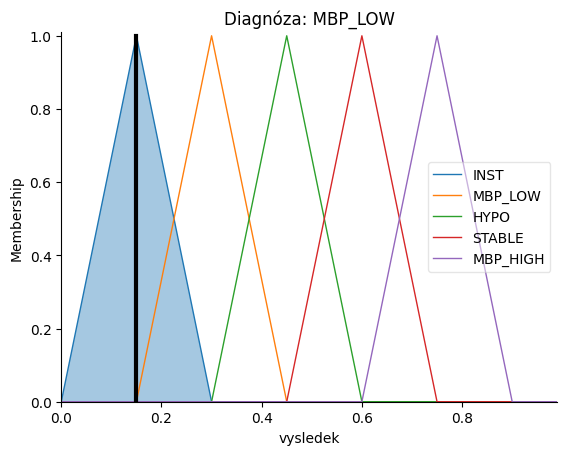

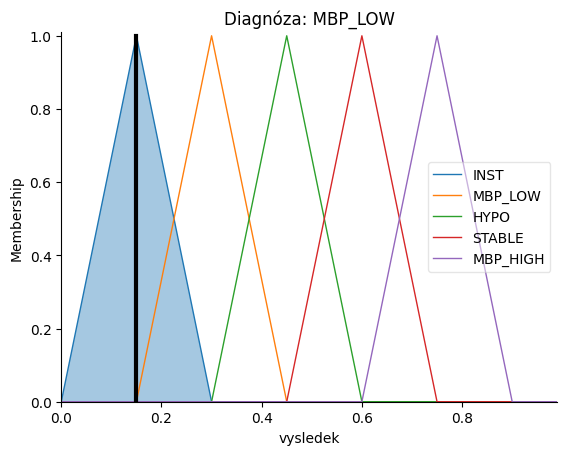

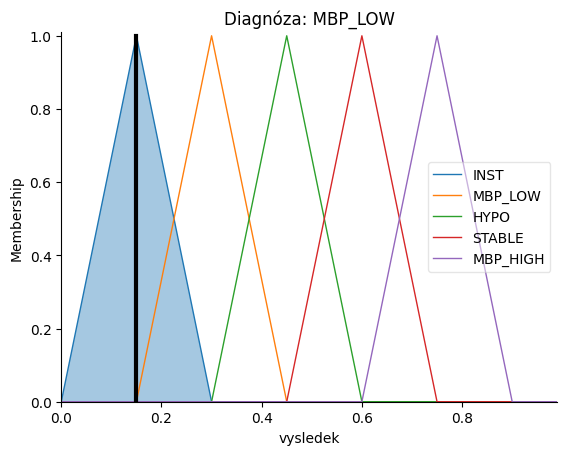

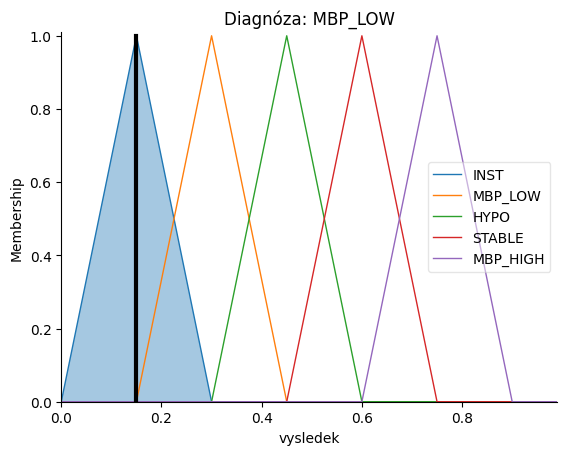

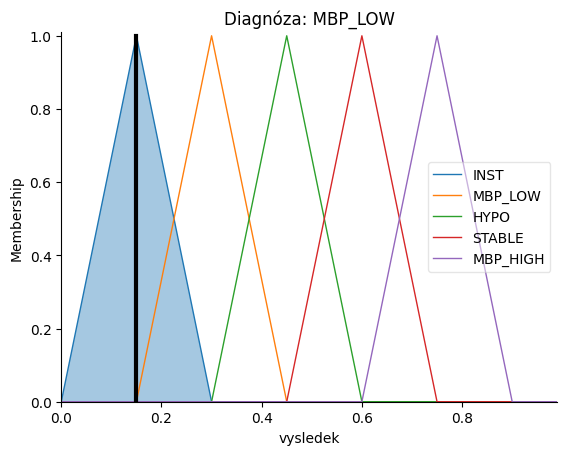

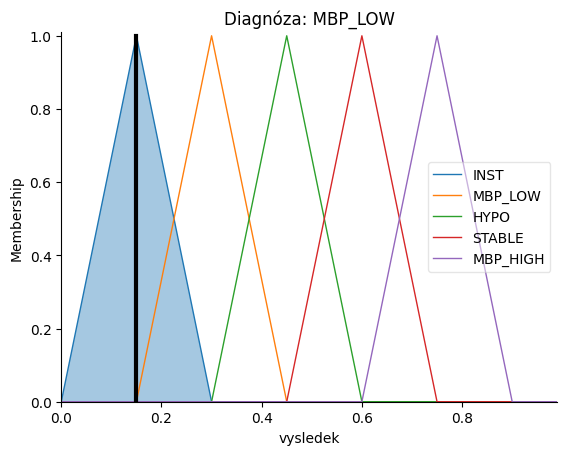

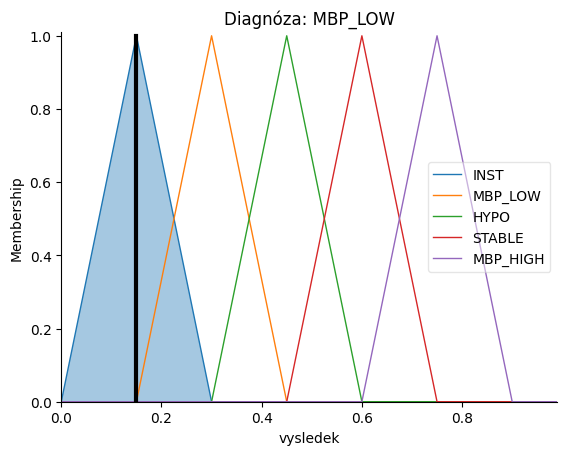

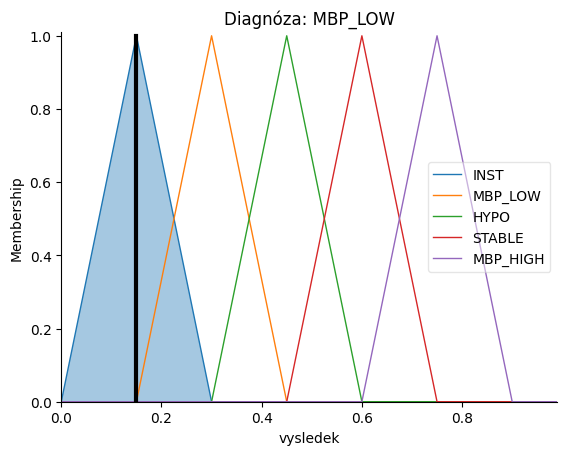

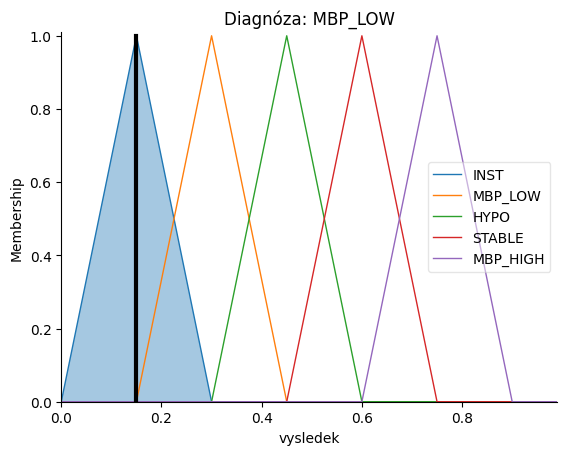

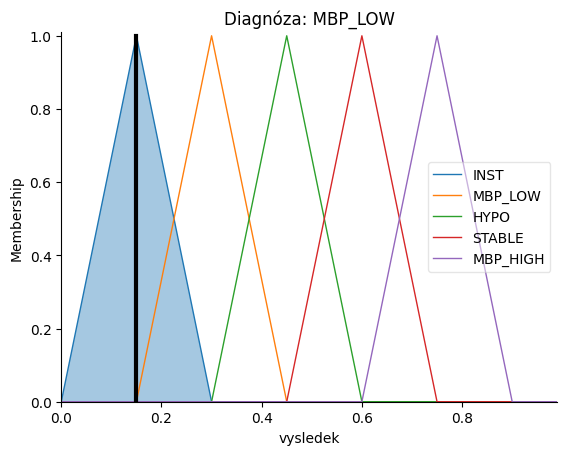

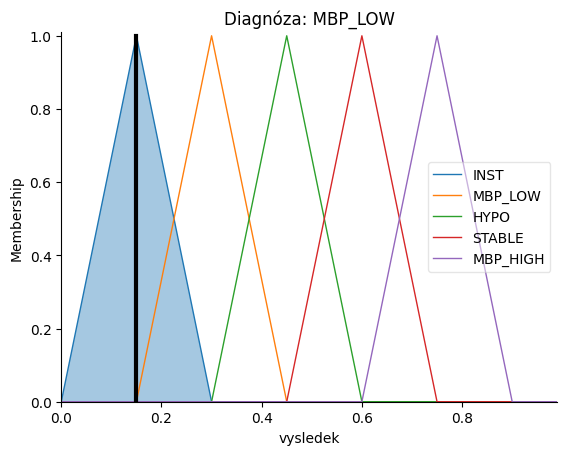

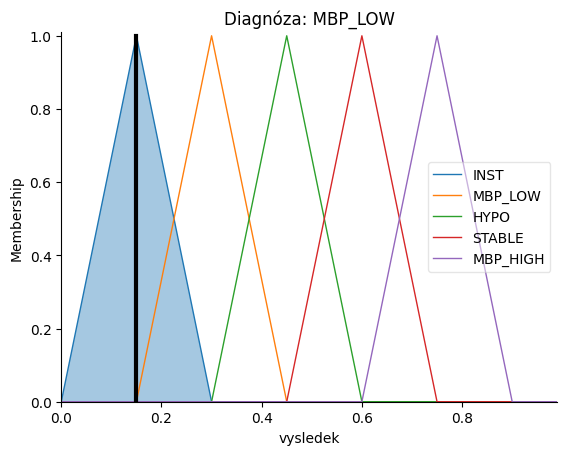

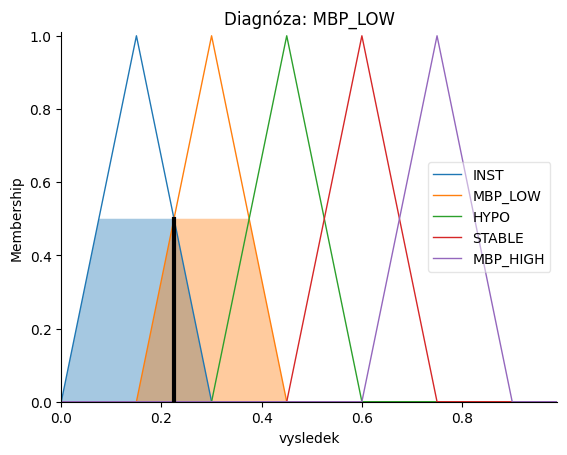

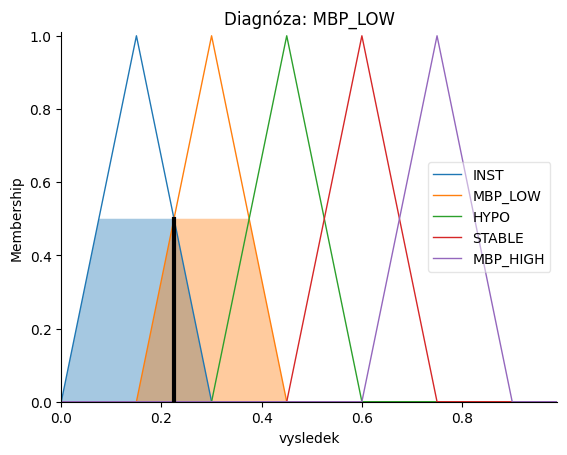

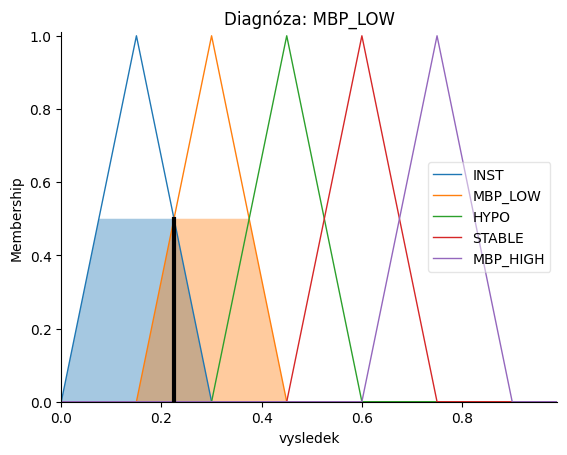

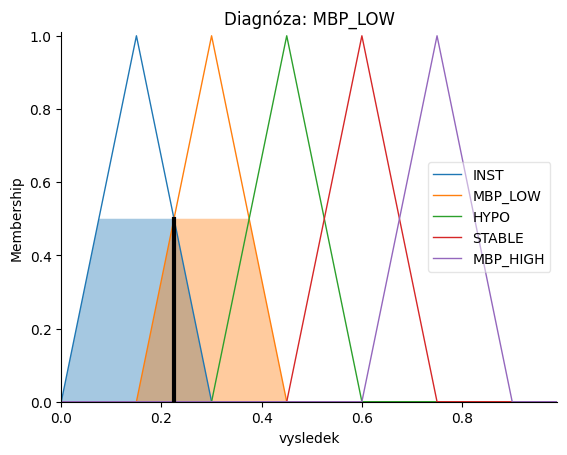

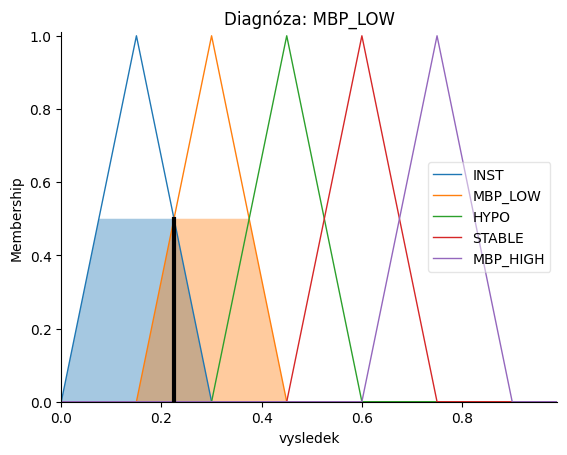

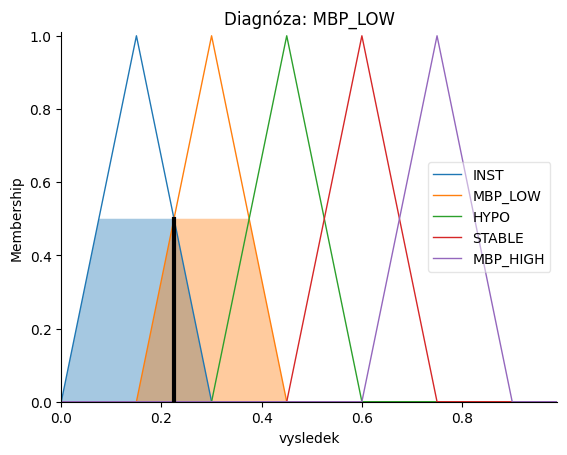

In [132]:
fuzzy_rozhodovani(pac1)

c:\Users\andyv\Desktop\2023 L\AUI\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


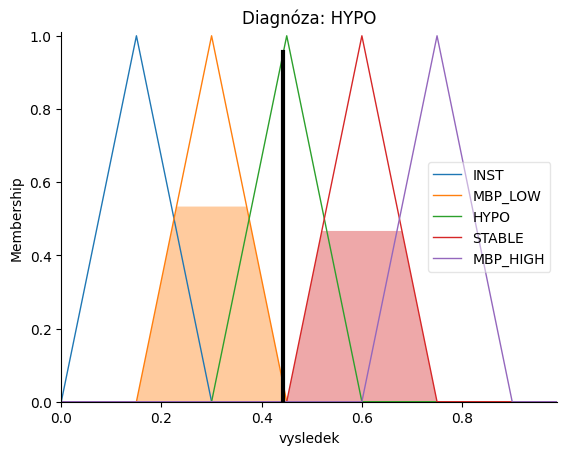

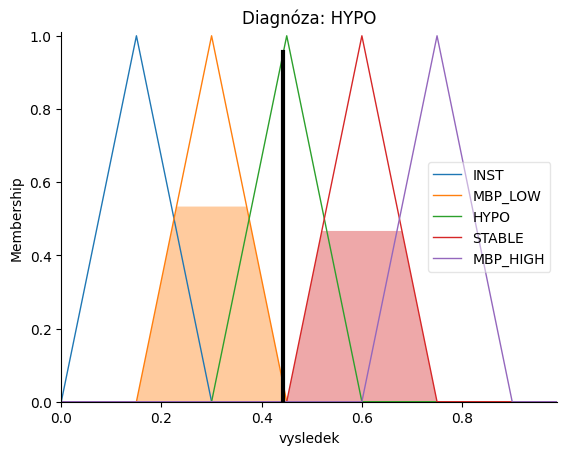

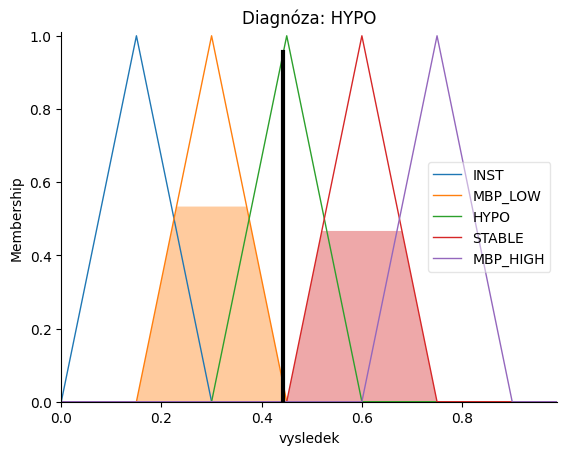

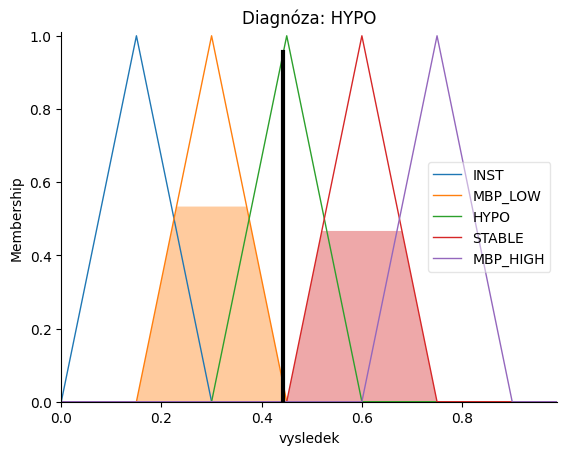

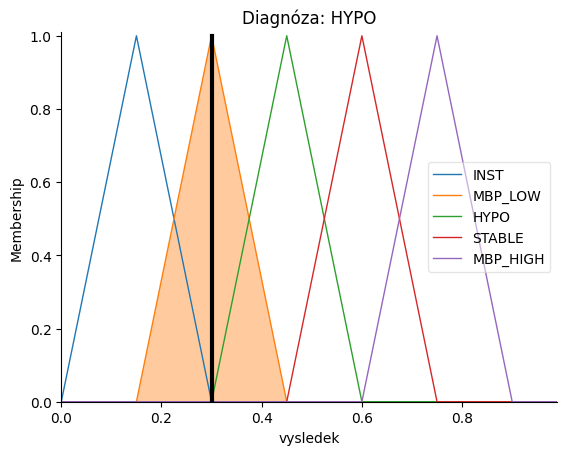

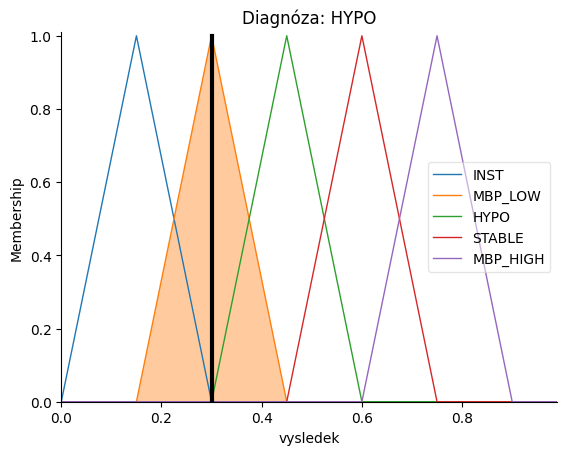

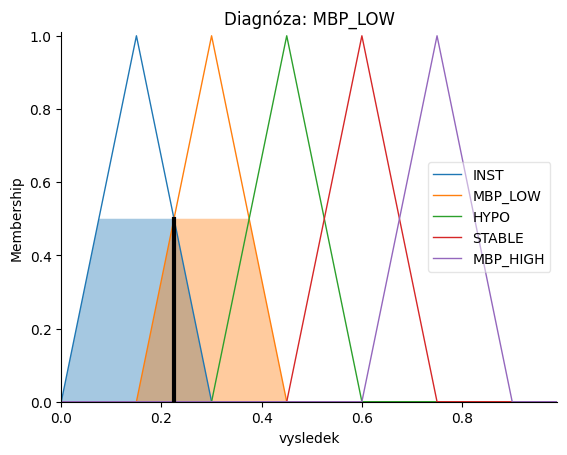

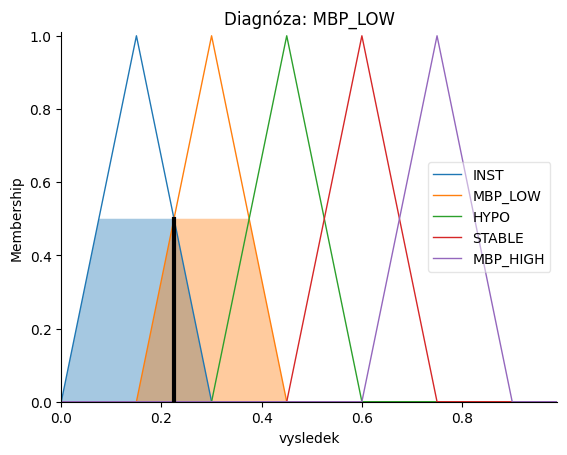

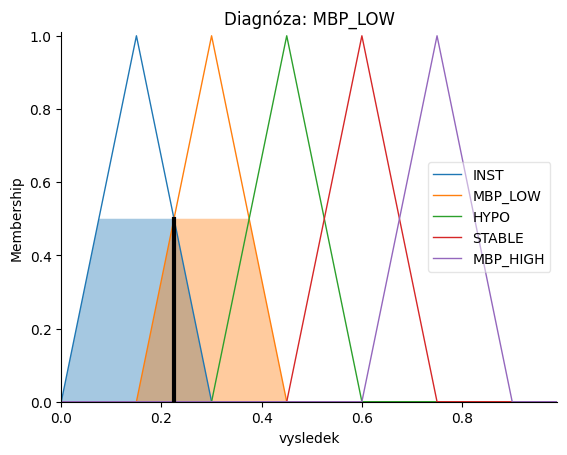

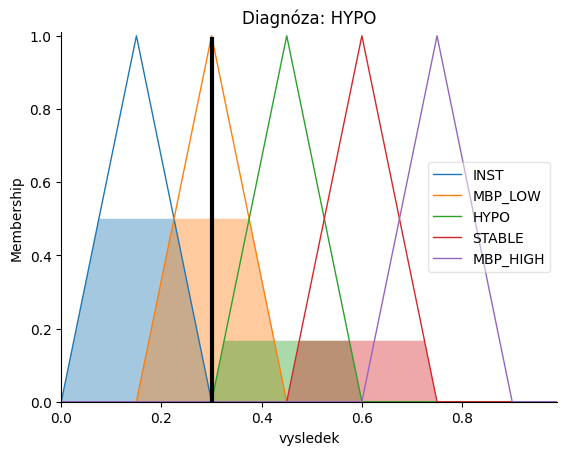

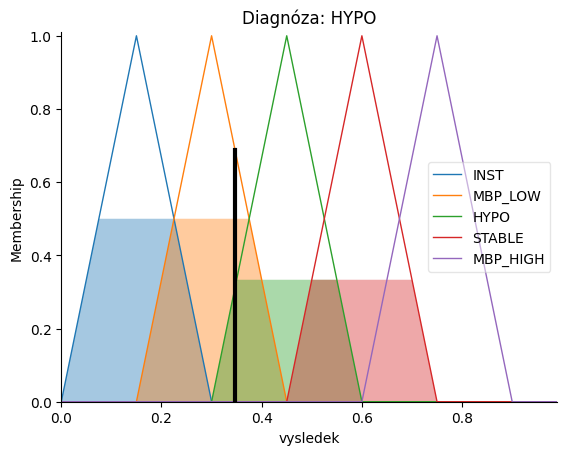

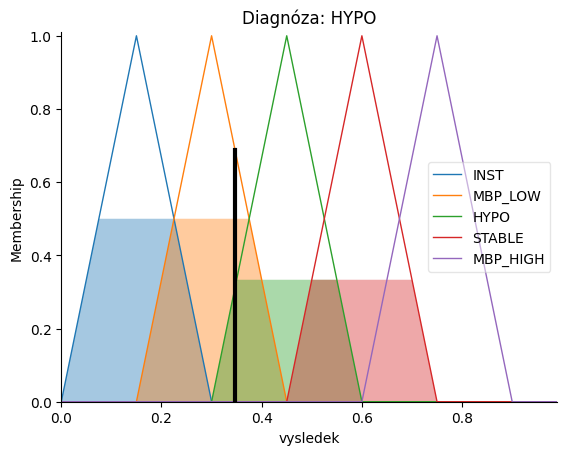

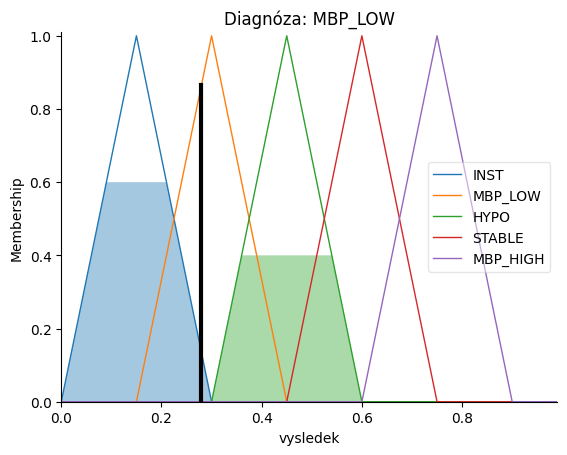

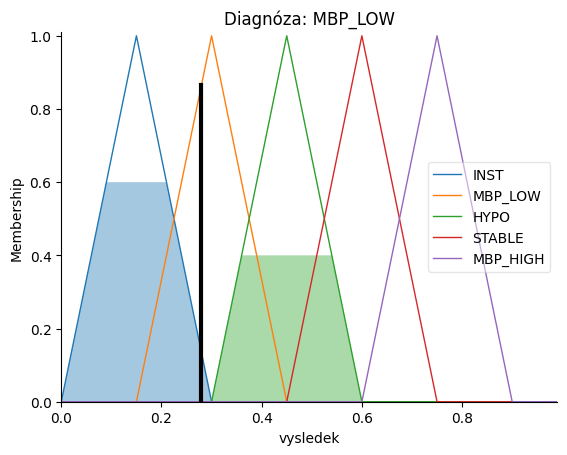

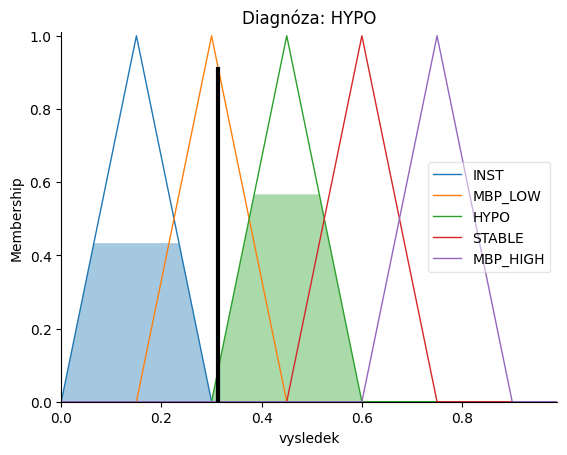

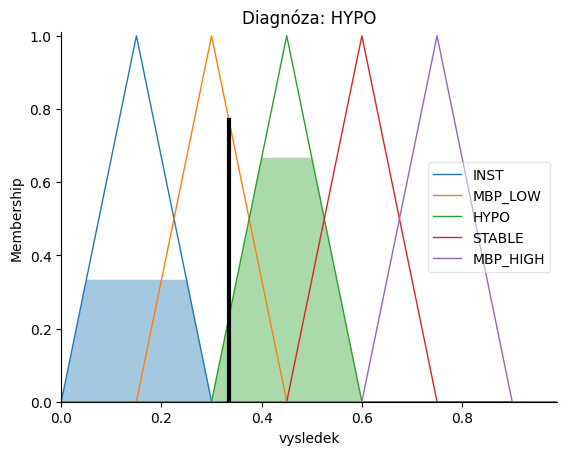

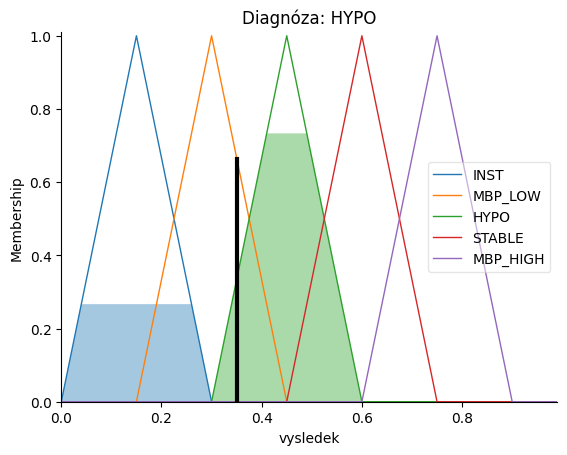

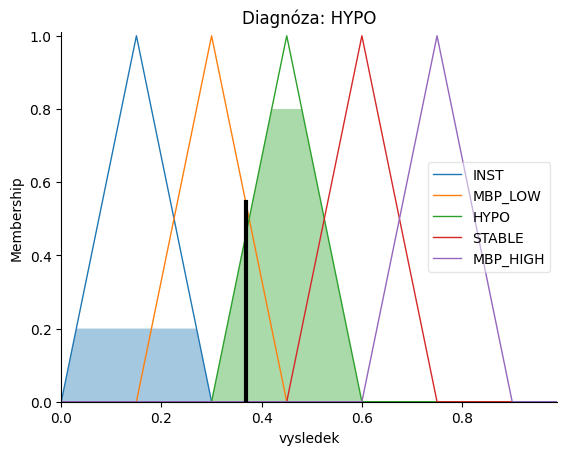

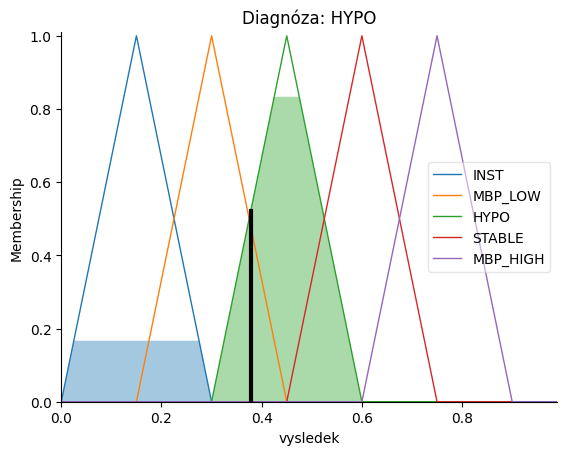

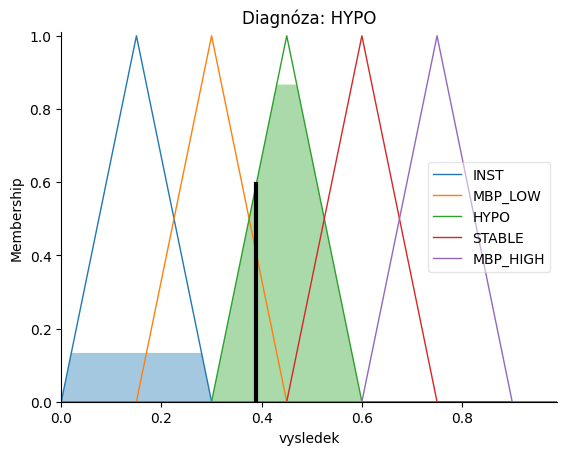

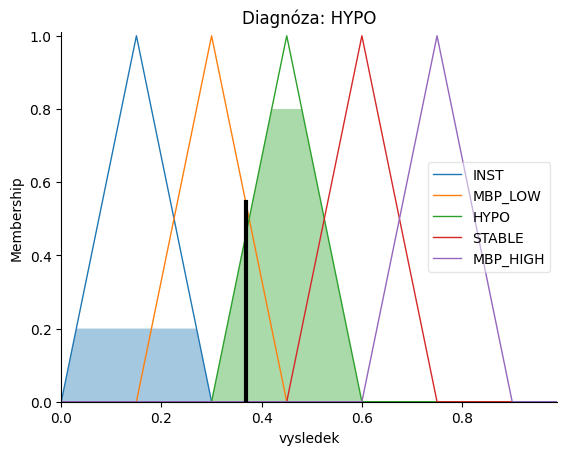

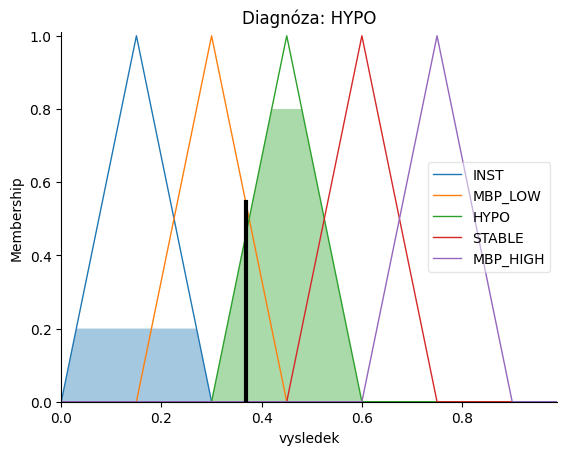

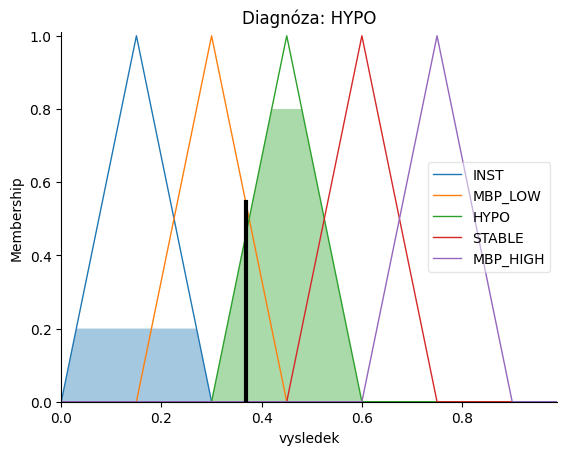

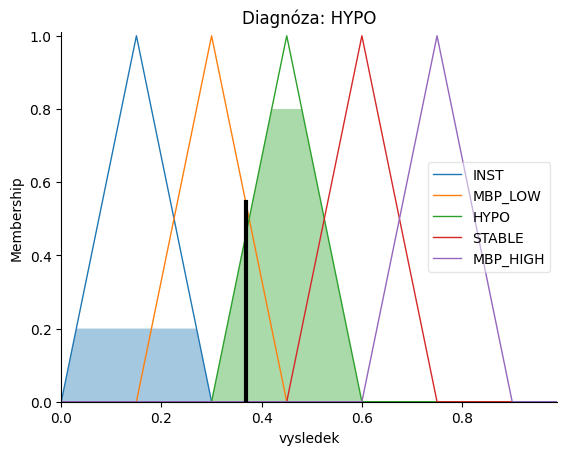

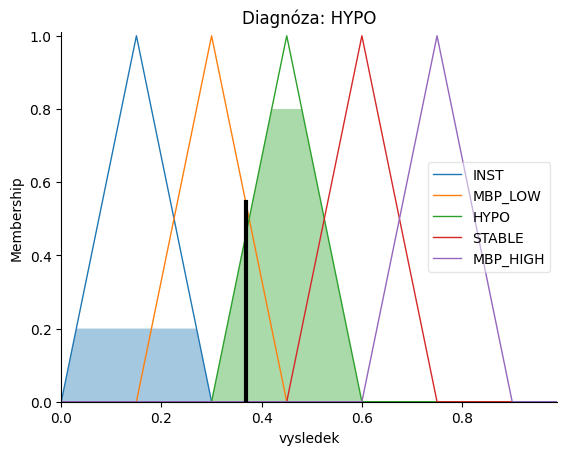

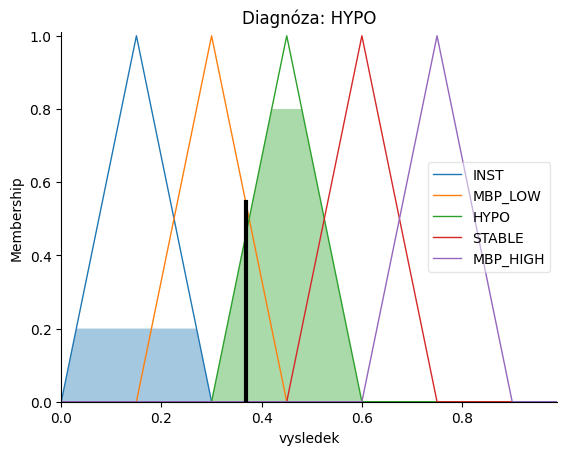

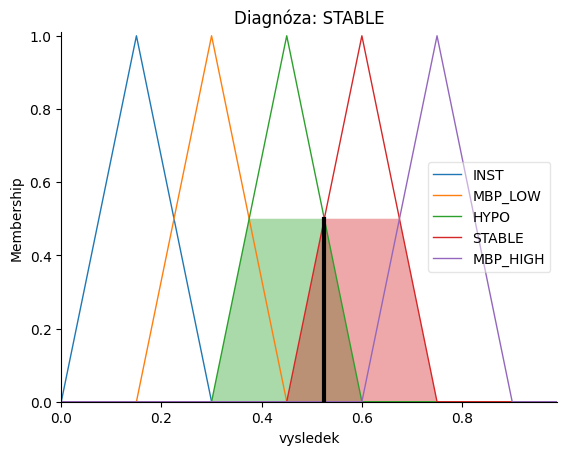

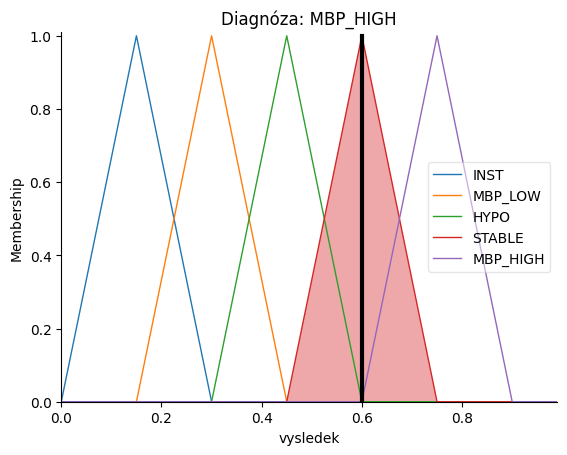

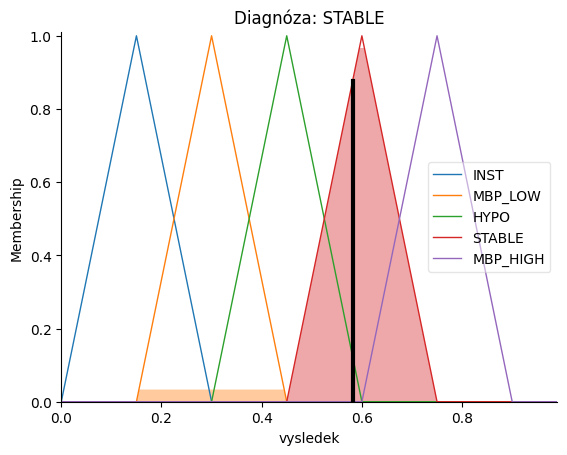

In [137]:
fuzzy_rozhodovani(pac2)